<a href="https://colab.research.google.com/github/dedemasutti/ProjectsinPython/blob/master/Weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## installing citipy

In [1]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675967 sha256=029a9b07278766dea5dfc623bde3581910fcb3a9e654e5cb7b8a563d0881d7df
  Stored in directory: /root/.cache/pip/wheels/41/82/37/8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


## Import libraries

In [2]:
# Import libraries

import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from datetime import datetime


# Import citipy module to determine the cities based on latitude and longitude
from citipy import citipy

#Empty list to store the latitude and longitude combinations
lat_lngs = []

# Empty list to store the names of cities
cities = []

# Define the range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# relate nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, add it to our list of cities using append method

    if city not in cities:
        cities.append(city)

# Print the cities
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


In [8]:
# Set the API base URL
weather_api_key = "75819173ce7d7174a9bf31f42a43abcf"
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid={}".format(weather_api_key)

# Define an empty list to fetch the weather data for each city
city_weather_data = []


# Create counters
record_count = 1
set_count = 1

In [9]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_weather_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass  ## general purpose statement to handle all errors and continue


Processing Record 1 of Set 1 | weining
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | conduaga
Processing Record 5 of Set 1 | bonthe
Processing Record 6 of Set 1 | sao joao da barra
Processing Record 7 of Set 1 | zhangjiajie
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | riberalta
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | bullsbrook
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | tobruk
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | martapura
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | ciudad camilo cienfuegos
City not found. Skipping...
Processing Record 23 of Set 1 | port m

In [10]:
# Convert the cities weather data into a Pandas DataFrame
data = pd.DataFrame(city_weather_data)
# Counting the number of non-null values in each column of the DataFrame
data.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [11]:
data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,weining,26.8500,104.2333,11.91,63,0,3.51,CN,2023-11-20 03:05:33
1,adamstown,-25.0660,-130.1015,21.91,90,100,7.18,PN,2023-11-20 03:05:34
2,port alfred,-33.5906,26.8910,18.99,96,100,0.45,ZA,2023-11-20 03:11:29
3,conduaga,8.8620,117.4893,29.71,71,100,2.89,PH,2023-11-20 03:11:30
4,bonthe,7.5264,-12.5050,24.88,88,100,0.26,SL,2023-11-20 03:05:35


In [15]:
 # Creating plots
def plot_and_regression(x, y, title, xlabel, ylabel):
        plt.scatter(x, y, label="Cities")
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        line = slope * x + intercept
        plt.plot(x, line, color='red', label='Linear Regression')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend()
        plt.show()
        print(f"R-squared: {r_value**2}")

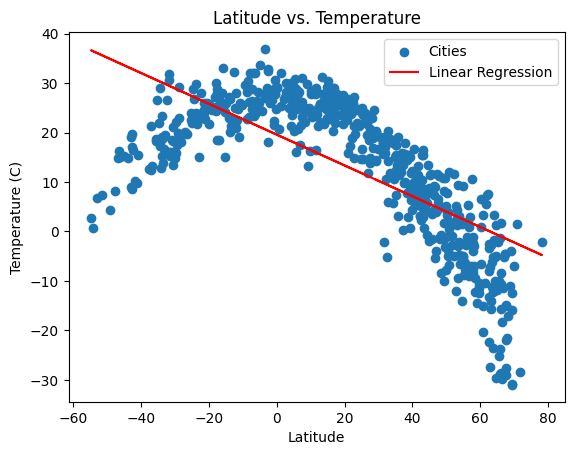

R-squared: 0.4985168559114555


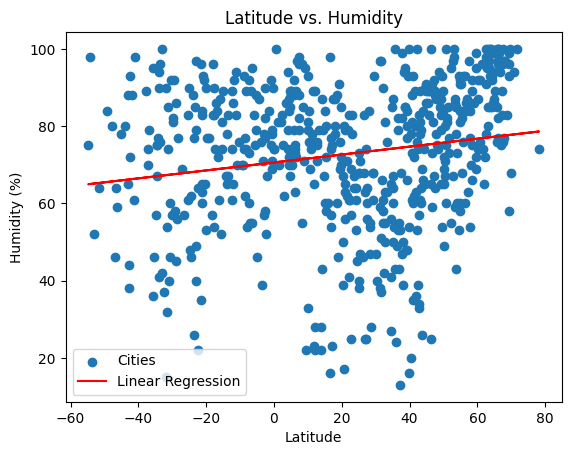

R-squared: 0.030326286913247937


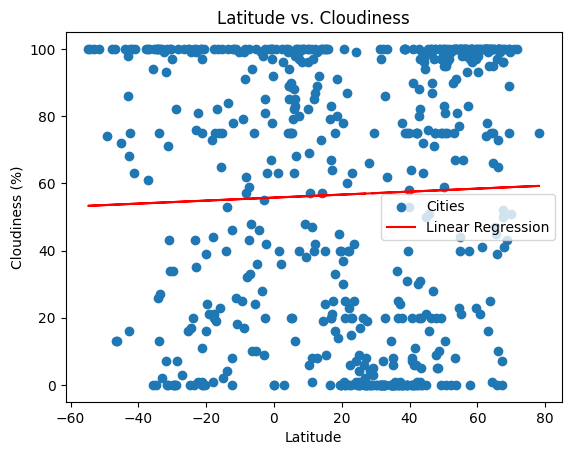

R-squared: 0.001279309464622836


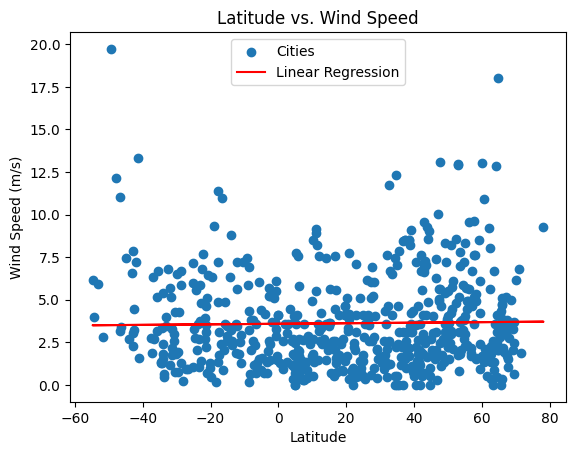

R-squared: 0.0003417821367214726


In [18]:
# Scatter plots to visualize the relationship between weather factors and this?


# Latitude vs temperature
plot_and_regression(data["Lat"], data["Max Temp"], "Latitude vs. Temperature", "Latitude", "Temperature (C)")

# Latitude vs humidity
plot_and_regression(data["Lat"], data["Humidity"], "Latitude vs. Humidity", "Latitude", "Humidity (%)")

# Latitude vs Cloudiness
plot_and_regression(data["Lat"], data["Cloudiness"], "Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)")

# Plot Latitude vs Wind Speed
plot_and_regression(data["Lat"], data["Wind Speed"], "Latitude vs. Wind Speed", "Latitude", "Wind Speed (m/s)")

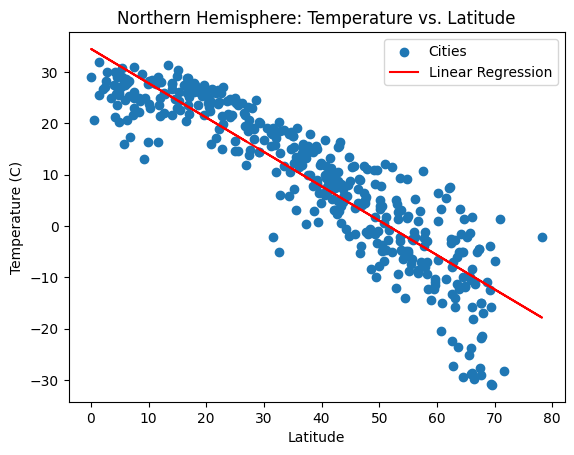

R-squared: 0.8066818871401655


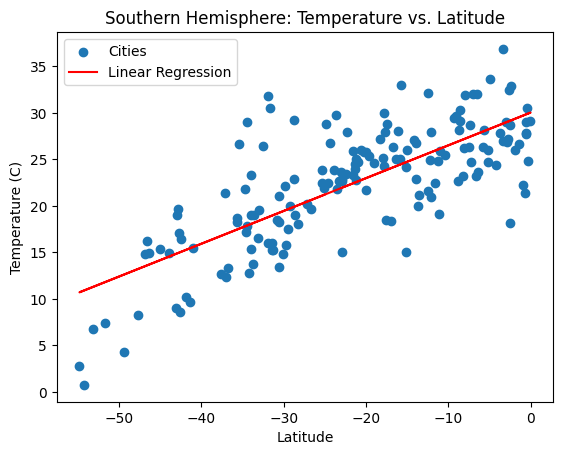

R-squared: 0.5676280326681722


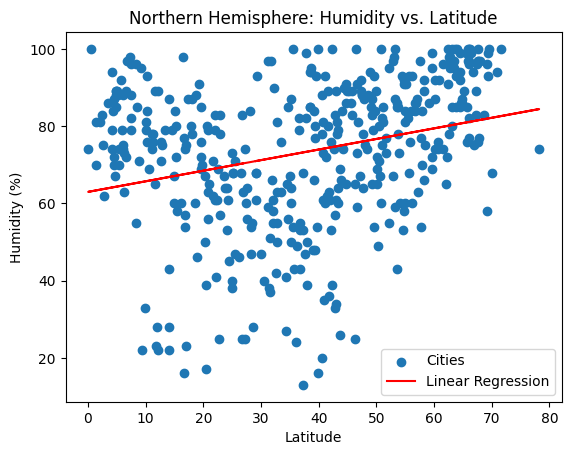

R-squared: 0.07701332934217343


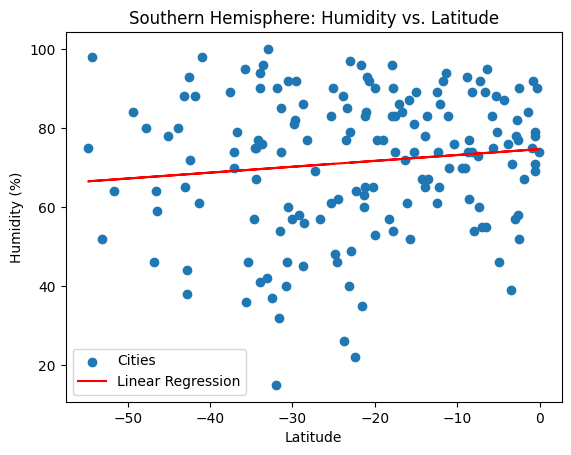

R-squared: 0.013633838931136838


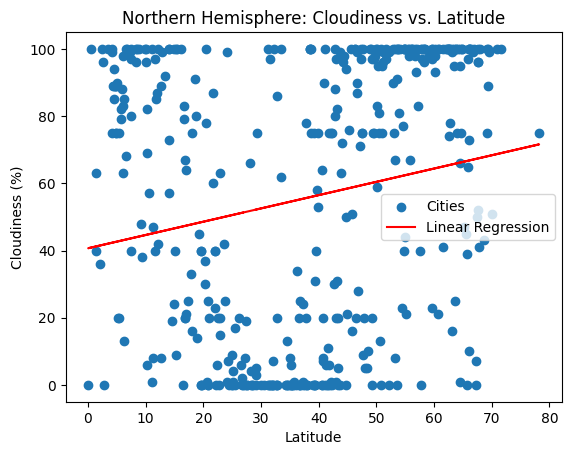

R-squared: 0.03668355978484273


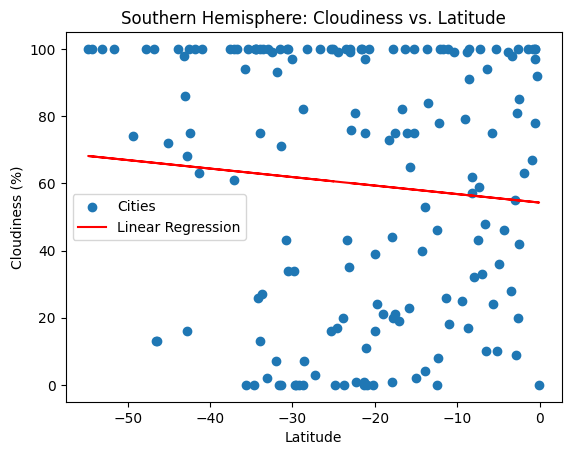

R-squared: 0.008290501601038641


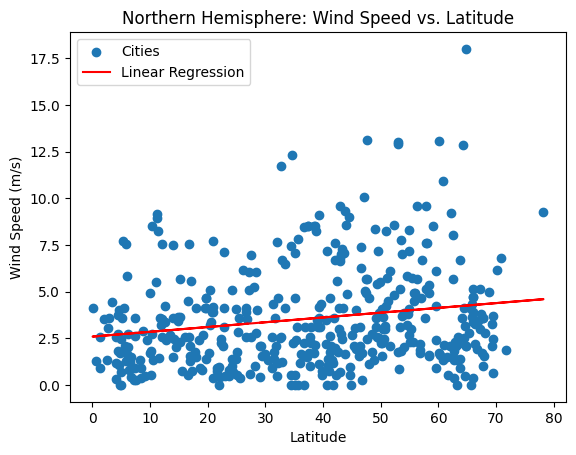

R-squared: 0.03370531539673672


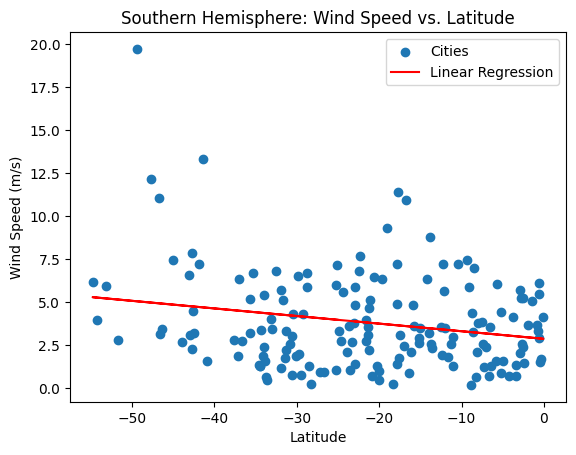

R-squared: 0.047603751239404815


In [19]:
# Generate linear regression plots for the Northern and Southern Hemispheres
northern_hemisphere = data[data["Lat"] >= 0]
southern_hemisphere = data[data["Lat"] < 0]

# Plotting and performing linear regression for the relationship between Temperature and Latitude in the Northern and Southern Hemispheres.
plot_and_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], "Northern Hemisphere: Temperature vs. Latitude", "Latitude", "Temperature (C)")
plot_and_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Temperature (C)")

# Plotting and performing linear regression for the relationship between Humidity and Latitude in the Northern and Southern Hemispheres.
plot_and_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], "Northern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")
plot_and_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], "Southern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")

# Plotting and performing linear regression for the relationship between Cloudiness and Latitude in the Northern and Southern Hemispheres.
plot_and_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], "Northern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")
plot_and_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], "Southern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")

# Plotting and performing linear regression for the relationship between Wind Speed and Latitude in the Northern and Southern Hemispheres.
plot_and_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], "Northern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")
plot_and_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], "Southern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")
